# Optimizing the Python Code for Big Data 
Balancing Coding Complexity against Computational Complexity 

    
    AUTHOR: Dr. Roy Jafari 

# Chapter 4: Taking Advantage of Vectorization and Broadcasting (V&B) 

## Challenge 1: V&B, iterating, applying, or mapping?

In this challenge, we are going to experience the significant difference between the performance of four methods of doing array operations. The four methods are the following.

- Iteration
- Pandas .apply() funciton 
- Mapping function
- V&B

Answer the following questions and do the following tasks.

1.	In this challenge, we will be using `numpy`, `pandas`, and `matplotlib` modules. So go ahead and import them as the following. 


In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.	The following code defines the function `one_experiment()` which creates a random DataFrame, random_df, which has two randomly generated columns, `C1` and `C2`. The number of rows in `random_df`, `n_rows`, is an input to the function `one_expriment()`. After `random_df` is generated, the function performs the same task of multiplying the values of `C1` with the values of `C2` with four methods, naming `iterate`, `apply`, `map`, and `v&b`, and records the time it takes to get the task done with each method. 
Study the code to understand exactly what the function `one_experiment()` does and run the code to define the function for your computer’s CPU. 

In [2]:
def one_experiment(n_rows):
    output, keep={}, []
    random_df = pd.DataFrame(
        {'C1': np.random.random(n_rows),
         'C2': np.random.random(n_rows)}
    )
    t0= time.time()
    for i,row in random_df.iterrows():
        keep.append(row.C1*row.C2)
    random_df['C3_iterate'] = keep
    output['iterate'] = time.time()-t0
    t0= time.time()
    random_df['C3_map'] = random_df.apply(
        lambda r:r.C1*r.C2,
        axis=1
    )
    output['apply'] = time.time()-t0
    t0= time.time()
    random_df['C3_map'] = list(
        map(
            lambda x,y:x*y,
            random_df.C1,
            random_df.C2
        )
    )
    output['map'] = time.time()-t0
    t0= time.time()
    random_df['C3_map'] =(
        random_df.C1 * random_df.C2
    ) 
    output['v&b'] = time.time()-t0
    return output

3.	Now that we have the function `one_experiment()` defined, go ahead and give it some use and run it with a few different `n_rows`. Study the outputs of the functions and describe your observations. 

In [3]:
one_experiment(1000)

{'iterate': 0.07847046852111816,
 'apply': 0.014076948165893555,
 'map': 0.0,
 'v&b': 0.0}

In [4]:
one_experiment(50000)

{'iterate': 1.7089755535125732,
 'apply': 0.8075144290924072,
 'map': 0.010962486267089844,
 'v&b': 0.0009982585906982422}

**Answer**: we see that even for small numbers of rows such as 1000 and 50,000 the difference between the methods in runtime shows themselves.

4.	The following function creates the function `experiments()` that expand the capability of the function `one_experiment()`. While the function `one_experiment()` only takes in `n_rows`, the function experiment also takes in `n_repeats`. The input `n_repeats` is the number of times that the function `one_experiment()` is repeated and the average time it takes for each method to complete the task is recorded and outputted. We added `n_repeats` because if we compare the methods only with just a one-time experiment the comparisons are not as reliable. Study the code and understand what exactly it does, and then run the code.

In [5]:
method_list = ['iterate','apply','map','v&b']
def experiments(n_rows,n_repeat):
    output = {m:0 for m in method_list}
    for _ in range(n_repeat):
        result = one_experiment(n_rows)
        output = {m:result[m]+output[m] 
                  for m in method_list}
    return {m:round(output[m]/n_repeat,5)
            for m in method_list}

5.	Now that we have the function `experiments()` defined, go ahead and give it some use and run it with a few different `n_rows` and `n_repeats`. For instance, you might want to run `experiments(100,5)` or `experiments(1000,10)`. Study the outputs of the functions and describe your observations.

In [13]:
experiments(1000,5)

{'iterate': 0.06806, 'apply': 0.02892, 'map': 0.0, 'v&b': 0.0}

In [14]:
experiments(50000,3)

{'iterate': 2.46436, 'apply': 1.14174, 'map': 0.02188, 'v&b': 0.0005}

**Answer**: Thes same observation we had in step 3: we see that even for small numbers of rows such as 1000 and 50,000 the difference between the methods in runtime shows themselves.

6.	Now we want to set up to do a systematic experiment to compare the four methods we are studying. The following code creates `result_df` which we will later use to record and study the results of our experiments. The index of `result_df` is the `n_rows` we will be passing to `experiments()`. Run the code and study its printout.

In [15]:
exp_options = [10**i for i in range(2,6)]
result_df = pd.DataFrame(index = exp_options,
                         columns = method_list)
print(result_df)

       iterate apply  map  v&b
100        NaN   NaN  NaN  NaN
1000       NaN   NaN  NaN  NaN
10000      NaN   NaN  NaN  NaN
100000     NaN   NaN  NaN  NaN


7.	The following code simply runs the function `experiment()` for each row if `result_df` and records its output into `result_df`. Pay attention that we are also passing 5 as `n_repeats` to experiment. run the code and study its output. Pay attention the code might take a few minutes to complete.

In [16]:
for o in exp_options:
    result_df.loc[o] = experiments(o,5)
print(result_df)

        iterate    apply      map      v&b
100     0.00564  0.00686  0.00035  0.00042
1000    0.04988  0.01844      0.0      0.0
10000   0.55621   0.2231  0.00525      0.0
100000  5.03532  2.00042  0.04378  0.00071


8.	Now we can use the wonderful matplotlib module to visualize our experiment. Run the following code, study the line plot it creates and describe your observations.

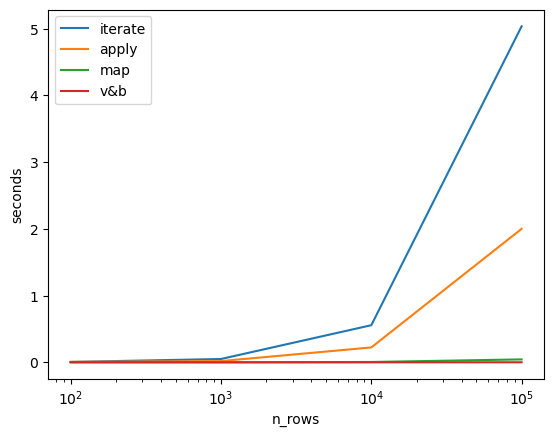

In [17]:
for m in method_list:
    result_df[m].plot(logx=True)
plt.xlabel('n_rows')
plt.ylabel('seconds')
plt.legend()
plt.savefig('images/challenge1_8.png', dpi=500)

**Answer**: the visual we created shows that we can order the methods in terms of their runtime as v&b, map, apply, and iterate. We see that the difference between iterate, apply and map is very obvious, but the difference between map and v&b is not so obvious.

9.	From your observation in the plot that you created in step 8, answer the following questions: 1) at what `n_rows` do we start seeing a significant difference between the methods `iterate` and `apply`? 2) at what `n_rows` do we start seeing a significant difference between the method `apply` and `map`? 3) at what `n_rows` do we start seeing a significant difference between the method `map` and `v&b`? Pay attention, the correct answer to some of the quesitons might be that the visual cannot help you answer the question.

**Answer**:

- *1) at what n_rows do we start seeing a significant difference between the methods iterate and apply?*: 10,000
- *2) at what n_rows do we start seeing a significant difference between the method apply and map?*: 10,000
- *3) at what n_rows do we start seeing a significant difference between the method map and v&b?*: We cannot answer this quesiton with this visual.

10.	For the questions that you were not able to answer, in step 9, design, code, and perform experiments and visualize its results so we can answer those questions. Answer the question(s) after completing the described experiments. 

**Answer**:

In [18]:
def one_experiment_zoom(n_rows):
    output, keep={}, []
    random_df = pd.DataFrame(
        {'C1': np.random.random(n_rows),
         'C2': np.random.random(n_rows)}
    )
    
    t0= time.time()
    random_df['C3_map'] = list(
        map(
            lambda x,y:x*y,
            random_df.C1,
            random_df.C2
        )
    )
    output['map'] = time.time()-t0
    
    t0= time.time()
    random_df['C3_map'] =(
        random_df.C1 * random_df.C2
    ) 
    output['v&b'] = time.time()-t0
    return output

In [19]:
method_list = ['map','v&b']
def experiments_zoom(n_rows,n_repeat):
    output = {m:0 for m in method_list}
    
    for _ in range(n_repeat):
        result = one_experiment_zoom(n_rows)
        output = {m:result[m]+output[m] 
                  for m in method_list}
    
    return {m:round(output[m]/n_repeat,5)
            for m in method_list}

In [20]:
exp_options = [10**i for i in range(2,9)]

result_zoom_df = pd.DataFrame(index = exp_options, columns = method_list)
print(result_zoom_df)

           map  v&b
100        NaN  NaN
1000       NaN  NaN
10000      NaN  NaN
100000     NaN  NaN
1000000    NaN  NaN
10000000   NaN  NaN
100000000  NaN  NaN


In [22]:
for o in exp_options:
    result_zoom_df.loc[o] = experiments_zoom(o,5)
print(result_zoom_df)

                map      v&b
100         0.00302  0.00127
1000            0.0      0.0
10000       0.00661      0.0
100000      0.04668  0.00322
1000000     0.43421  0.00365
10000000    4.34421   0.0884
100000000  44.90689  0.44595


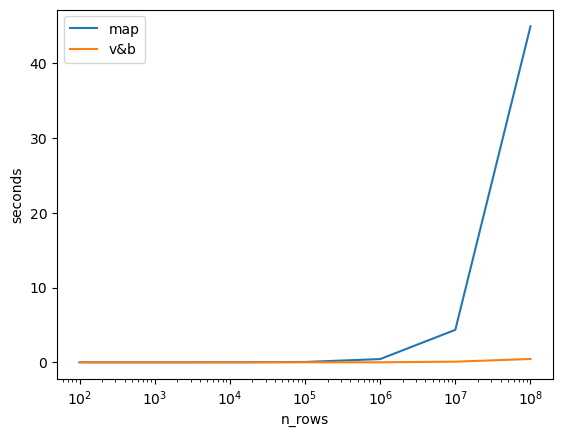

In [23]:
for m in method_list:
    result_zoom_df[m].plot(logx=True)
plt.xlabel('n_rows')
plt.ylabel('seconds')
plt.legend()
plt.savefig('images/challenge1_10.png',dpi=500)

- *3) at what n_rows do we start seeing a significant difference between the method map and v&b?*: 10,000,000